### Sottoproblema 1: Prendere in input dei dati dall'utente e memorizzarli sottoforma di numeri


Qui andremo a prendere 6 input dall'utente e a trasformarli in variabili float

In [1]:
hp = float(input('quale è il valore dei punti vita?\n'))
attack = float(input('quale è il valore di attacco?\n'))
defense = float(input('quale è il valore di difesa?\n'))
sp_atk = float(input("quale è il valore dell'attacco speciale?\n"))
sp_def = float(input("quale è il valore della difesa speciale?\n"))
speed = float(input("quale è il valore della velocità?\n"))

quale è il valore dei punti vita?
42
quale è il valore di attacco?
42
quale è il valore di difesa?
42
quale è il valore dell'attacco speciale?
42
quale è il valore della difesa speciale?
42
quale è il valore della velocità?
42


In [2]:
print('punti vita', hp)
print('attacco', attack)
print('difesa', defense)
print('attacco speciale', sp_atk)
print('difesa speciale', sp_def)
print('velocità', speed)

punti vita 42.0
attacco 42.0
difesa 42.0
attacco speciale 42.0
difesa speciale 42.0
velocità 42.0


### Sottoproblema 2.a Leggere dal dataset tutti i dati relativi ai Pokemon


Qui andremo ad aprire il dataset dei pokemon e ad assegnarlo ad una variabile

Se sei è su Colab
```python
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/beginners')
```

In [3]:
import csv

In [4]:
pokemon_rows = []
with open('pokemon.csv', 'r') as file2:
    reader = csv.reader(file2)
    columns = next(reader)
    print(columns)
    for row in reader:
        pokemon_rows.append(row)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [5]:
print(pokemon_rows[-1])

['721', 'Volcanion', 'Fire', 'Water', '600', '80', '110', '120', '130', '90', '70', '6', 'True']


In [ ]:
print(pokemon_rows[0])

In [ ]:
print(len(pokemon_rows))

Facciamo la stessa cosa utilizzando pandas (panel-datas), una libreria per la manipolazione e l'analisi dei dati che offre strutture dati e operazioni per manipolare tabelle numeriche e serie temporali.


In [ ]:

!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
df_pokemon = pd.read_csv('pokemon.csv')

In [ ]:
df_pokemon.head()

In [ ]:
df_pokemon.head(2)

In [ ]:
df_pokemon.tail()

In [ ]:
df_pokemon.tail(3)

### Sottoproblema 2.b Utilizzare una funzione per stabilire un grado di similarità


Qui andremo a creare e testare le funzioni per
- calcolo della distanza euclidea
- normalizzazione
Inoltre ci andremo a prendere le colonne con i soli valori numerici dal dataset

In [ ]:
p1 = (5, 8)
p2 = (7, 6)

In [ ]:
def euclidean_distance(p, q):
    distance = 0
    for px, qx in zip(p, q):
        distance += (px - qx) ** 2
    distance = distance ** (1 / 2)
    return distance


print(euclidean_distance(p1, p2))

usiamo la libreria math

In [ ]:
import math

In [ ]:
def euclidean_distance(p, q):
    distance = 0
    for px, qx in zip(p, q):
        distance += math.pow((px - qx), 2)
    distance = math.sqrt(distance)
    return distance


print(euclidean_distance(p1, p2))

  New in version 3.8

In [ ]:
def euclidean_distance(p, q):
    return math.dist(p, q)


print(euclidean_distance(p1, p2))

In [ ]:
print(columns)

Selezioniamo i valori di interesse e inseriamoli in una lista

In [ ]:
indexs = [5, 6, 7, 8, 9, 10]

In [ ]:
def get_pokemon_values(row):
    pokemon_values = []
    for index in indexs:
        pokemon_values.append(float(row[index]))
    return pokemon_values

In [ ]:
print(get_pokemon_values(pokemon_rows[0]))

In [ ]:
for i in range(2,10,2):
    print(i)

In [ ]:
lista=['a','b','c']
for n,i in enumerate(lista):
    print(n,i)

In [ ]:
pokemon_values = []
for row in pokemon_rows:
    pokemon_values.append(get_pokemon_values(row))

In [ ]:
pokemon_values[0]

In [ ]:
print(pokemon_rows[0])

Selezioniamo i valori di interesse con pandas

In [ ]:
print(list(df_pokemon.columns))

In [ ]:
COLUMNS = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
df_pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].head()

In [ ]:
df_pokemon[COLUMNS].head()

In [ ]:
print(type(df_pokemon.iloc[0]))
print(df_pokemon.iloc[0])

selezioniamo i valori di interesse uno alla volta

In [ ]:
print(type(list(df_pokemon.iloc[0])))
print(list(df_pokemon.iloc[0]))

In [ ]:
def get_df_pokemon_values(row):
    pokemon_values = row[COLUMNS]
    return list(pokemon_values)

In [ ]:
print(get_df_pokemon_values(df_pokemon.iloc[0]))

selezioniamo i valori di interesse tutti insieme

In [ ]:
df_pokemon_values = df_pokemon[COLUMNS]

In [ ]:
df_pokemon_values.head()

In [ ]:
df_pokemon_values.values.tolist()

In [ ]:
list_df_pokemon_values = df_pokemon_values.values.tolist()

In [ ]:
list_df_pokemon_values

In [ ]:
print(list_df_pokemon_values == pokemon_values)

### Bonus Trak Normalizzazione
Creiamo una funzione per normalizzare

In [ ]:
def normalizer(dataset):
    min_max = []
    for column in range(len(dataset[0])):
        col_values = [row[column] for row in dataset]
        min_value = min(col_values)
        max_value = max(col_values)
        min_max.append((min_value, max_value))
    normalized_dataset = []
    for row in dataset:
        normalized_row = []
        for i, element in enumerate(row):
            normalized_element = (element - min_max[i][0]) / (min_max[i][1] - min_max[i][0])
            normalized_row.append(normalized_element)
        normalized_dataset.append(normalized_row)
    return normalized_dataset


normalized_pokemon_rows = normalizer(pokemon_values)
print(normalized_pokemon_rows[0])

In [ ]:
print(normalized_pokemon_rows[700])

Normalizziamo con pandas

In [ ]:
df_pokemon.min()

In [ ]:
def df_normalizer(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df


df_normalized = df_normalizer(df_pokemon[COLUMNS])
print(df_normalized.head())

### Sottoproblema 2.c Trovare i k pokemon più simili utilizzando la funzione di similarità


Qui andremo ad unire i pezzi:
- Partiamo dall'input dell'utente e creiamo una lista corrispondente ad un pokemon "fittizio"
- Aggiungiamo al dataset e normalizziamo (ottenendo un dataset normalizzato)
- Estraiamo ultima riga (corrispondente al pokemon fittizio)
- in un ciclo for calcoliamo le distanze e le inseriamo nella struttura dati complessa
- orinamento tramite sort e lambda
- estraiamo i primi K elementi

In [91]:
lista=['a','b','c']
def test(l):
    l.append(1)
    
test(lista)
print(lista)

['a', 'b', 'c', 1]


In [92]:
def sorter(x):
    return x[1]

In [93]:
def get_k_neighbors(dataset, element, k=5):
    complete_dataset = dataset + [element]
    normalized_dataset = normalizer(complete_dataset)
    normalized_element = normalized_dataset[-1]
    normalized_dataset = normalized_dataset[:-1]
    distances = []
    for i, row in enumerate(normalized_dataset):
        distance = euclidean_distance(normalized_element, row)
        distances.append((i, distance))
    distances.sort(key=sorter)
    return distances[:k]

In [94]:
hp = float(input('quale è il valore dei punti vita?\n'))
attack = float(input('quale è il valore di attacco?\n'))
defense = float(input('quale è il valore di difesa?\n'))
sp_atk = float(input("quale è il valore dell'attacco speciale?\n"))
sp_def = float(input("quale è il valore della difesa speciale?\n"))
speed = float(input("quale è il valore della velocità?\n"))

quale è il valore dei punti vita?
42
quale è il valore di attacco?
42
quale è il valore di difesa?
42
quale è il valore dell'attacco speciale?
42
quale è il valore della difesa speciale?
42
quale è il valore della velocità?
42


In [95]:
our_pokemon = [hp, attack, defense, sp_atk, sp_def, speed]
neighbors = get_k_neighbors(pokemon_values, our_pokemon)

In [96]:
print(neighbors)

[(143, 0.07332215672924264), (34, 0.07461084055276992), (324, 0.0779805020361919), (563, 0.08310581695328843), (255, 0.08554251618411642)]


usiamo pandas

In [ ]:
def df_euclidean_distance(row, normalized_element):
    return euclidean_distance(row, normalized_element)


In [100]:
def df_get_k_neighbors(dataset, element, k=5):
    df_pokemon_values = dataset[COLUMNS]
    pokemon_index = df_pokemon_values.index.max() + 1
    pokemon = pd.Series(element, COLUMNS, name=pokemon_index)
    complete_dataset = pd.concat([df_pokemon_values, pd.DataFrame([pokemon])])
    normalized_dataset = df_normalizer(complete_dataset)
    normalized_element = normalized_dataset.loc[pokemon_index]
    normalized_dataset = normalized_dataset[normalized_dataset.index != pokemon_index]
    normalized_dataset['distance'] = normalized_dataset.apply(df_euclidean_distance,normalized_element=normalized_element ,axis=1)
    normalized_dataset.sort_values('distance', inplace=True)
    return normalized_dataset.head(k)[['distance']]

In [98]:
hp = float(input('quale è il valore dei punti vita?\n'))
attack = float(input('quale è il valore di attacco?\n'))
defense = float(input('quale è il valore di difesa?\n'))
sp_atk = float(input("quale è il valore dell'attacco speciale?\n"))
sp_def = float(input("quale è il valore della difesa speciale?\n"))
speed = float(input("quale è il valore della velocità?\n"))

quale è il valore dei punti vita?
42
quale è il valore di attacco?
42
quale è il valore di difesa?
42
quale è il valore dell'attacco speciale?
42
quale è il valore della difesa speciale?
42
quale è il valore della velocità?
42


In [101]:
our_pokemon = [hp, attack, defense, sp_atk, sp_def, speed]
df_neighbors = df_get_k_neighbors(df_pokemon, our_pokemon)
print(df_neighbors)

     distance
143  0.073322
34   0.074611
324  0.077981
563  0.083106
255  0.085543


### Sottoproblema 3 Visualizzare i risultati

In [42]:
print(columns)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


In [43]:
def print_pokemon(index):
    s = f'{pokemon_rows[index][0]} - {pokemon_rows[index][1]}, di tipo {pokemon_rows[index][2]}'
    if pokemon_rows[index][-1] == 'True':
        s +='\n - Pokemon Leggendario'
    else:
        s += '\n - Pokemon Non Leggendario'
    for column, value in zip(columns, pokemon_rows[index]):
        s += f'\n{column:10} -> {value:5}'
    print(s + '\n')

In [44]:
for n in neighbors:
    print_pokemon(n[0])

132 - Ditto, di tipo Normal
 - Pokemon Non Leggendario
#          -> 132  
Name       -> Ditto
Type 1     -> Normal
Type 2     ->      
Total      -> 288  
HP         -> 48   
Attack     -> 48   
Defense    -> 48   
Sp. Atk    -> 48   
Sp. Def    -> 48   
Speed      -> 48   
Generation -> 1    
Legendary  -> False

29 - Nidoranâ™€, di tipo Poison
 - Pokemon Non Leggendario
#          -> 29   
Name       -> Nidoranâ™€
Type 1     -> Poison
Type 2     ->      
Total      -> 275  
HP         -> 55   
Attack     -> 47   
Defense    -> 52   
Sp. Atk    -> 40   
Sp. Def    -> 40   
Speed      -> 41   
Generation -> 1    
Legendary  -> False

300 - Skitty, di tipo Normal
 - Pokemon Non Leggendario
#          -> 300  
Name       -> Skitty
Type 1     -> Normal
Type 2     ->      
Total      -> 260  
HP         -> 50   
Attack     -> 45   
Defense    -> 45   
Sp. Atk    -> 35   
Sp. Def    -> 35   
Speed      -> 50   
Generation -> 3    
Legendary  -> False

504 - Patrat, di tipo Normal
 - Pokemo

con pandas

In [45]:
def print_pokemon(index):
    s = f'{df_pokemon.loc[index, "#"]} - {df_pokemon.loc[index, "Name"]}, di tipo {df_pokemon.loc[index, "Type 1"]}'
    if df_pokemon.loc[index, "Legendary"]:
        s += '\n - Pokemon Leggendario'
    else:
        s += '\n - Pokemon Non Leggendario'
    for column in df_pokemon.columns:
        s += f'\n{column:10} -> {df_pokemon.loc[index, column]:5}'
    print(s + '\n')

In [46]:
for n in df_neighbors.index:
    print_pokemon(n)

132 - Ditto, di tipo Normal
 - Pokemon Non Leggendario
#          ->   132
Name       -> Ditto
Type 1     -> Normal
Type 2     ->   nan
Total      ->   288
HP         ->    48
Attack     ->    48
Defense    ->    48
Sp. Atk    ->    48
Sp. Def    ->    48
Speed      ->    48
Generation ->     1
Legendary  ->     0

29 - Nidoran♀, di tipo Poison
 - Pokemon Non Leggendario
#          ->    29
Name       -> Nidoran♀
Type 1     -> Poison
Type 2     ->   nan
Total      ->   275
HP         ->    55
Attack     ->    47
Defense    ->    52
Sp. Atk    ->    40
Sp. Def    ->    40
Speed      ->    41
Generation ->     1
Legendary  ->     0

300 - Skitty, di tipo Normal
 - Pokemon Non Leggendario
#          ->   300
Name       -> Skitty
Type 1     -> Normal
Type 2     ->   nan
Total      ->   260
HP         ->    50
Attack     ->    45
Defense    ->    45
Sp. Atk    ->    35
Sp. Def    ->    35
Speed      ->    50
Generation ->     3
Legendary  ->     0

504 - Patrat, di tipo Normal
 - Pokemon No

### Visualizzare i Pokemon


In [47]:
from IPython.display import Image

--------------------------------------------------
1
Ditto


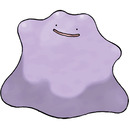

--------------------------------------------------
--------------------------------------------------
2
Nidoranâ™€


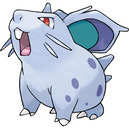

--------------------------------------------------
--------------------------------------------------
3
Skitty


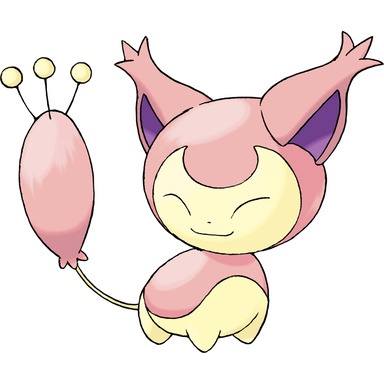

--------------------------------------------------
--------------------------------------------------
4
Patrat


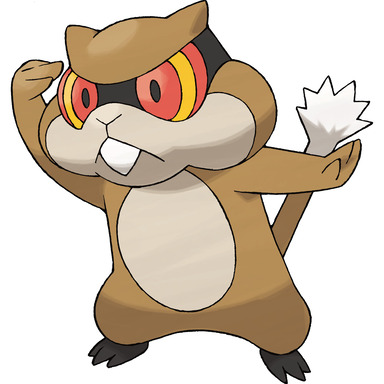

--------------------------------------------------
--------------------------------------------------
5
Tyrogue


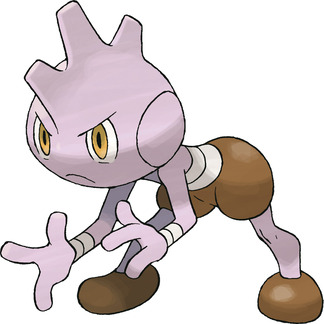

--------------------------------------------------


In [48]:
for n, p in enumerate(neighbors):
    index = p[0]
    print('-' * 50)
    print(n + 1)
    print(pokemon_rows[index][1])
    display(Image(f"resized/{pokemon_rows[index][0]}.jpg", width=150))
    print('-' * 50)

con pandas

--------------------------------------------------
1
Ditto


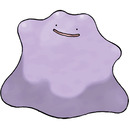

--------------------------------------------------
--------------------------------------------------
2
Nidoran♀


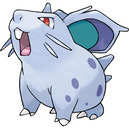

--------------------------------------------------
--------------------------------------------------
3
Skitty


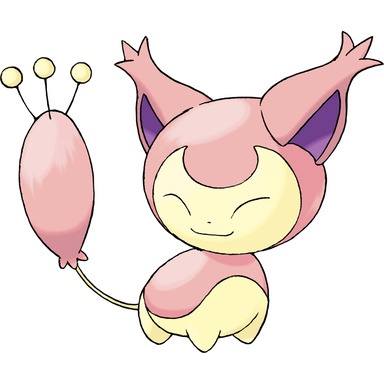

--------------------------------------------------
--------------------------------------------------
4
Patrat


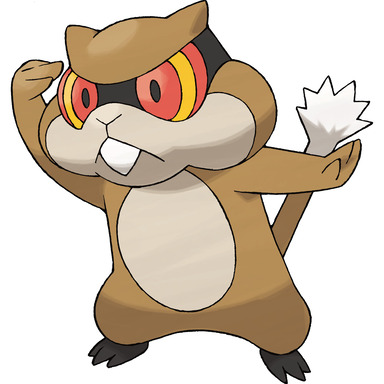

--------------------------------------------------
--------------------------------------------------
5
Tyrogue


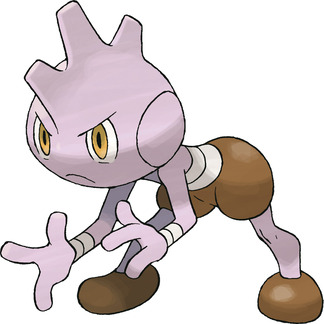

--------------------------------------------------


In [49]:
from IPython.display import Image

for n, p in enumerate(df_neighbors.index):
    index = p
    print('-' * 50)
    print(n + 1)
    print(df_pokemon.loc[index, 'Name'])
    display(Image(f'resized/{df_pokemon.loc[index, "#"]}.jpg', width=150))
    print('-' * 50)

## Riassumendo

In [50]:
import pandas as pd
import math

COLUMNS = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

df_pokemon = pd.read_csv('pokemon.csv')


def euclidean_distance(p, q):
    return math.dist(p, q)


def df_normalizer(df):
    normalized_df = (df - df.min()) / (df.max() - df.min())
    return normalized_df


def df_get_k_neighbors(dataset, element, k=5):
    df_pokemon_values = dataset[COLUMNS]
    pokemon_index = df_pokemon_values.index.max() + 1
    pokemon = pd.Series(element, COLUMNS, name=pokemon_index)
    complete_dataset = pd.concat([df_pokemon_values, pd.DataFrame([pokemon, ])])
    normalized_dataset = df_normalizer(complete_dataset)
    normalized_element = normalized_dataset.loc[pokemon_index]
    normalized_dataset = normalized_dataset[normalized_dataset.index != pokemon_index]
    normalized_dataset['distance'] = normalized_dataset.apply(lambda row: euclidean_distance(row, normalized_element),
                                                              axis=1)
    normalized_dataset.sort_values('distance', inplace=True)
    return normalized_dataset.head(k)[['distance']]


def print_pokemon(index):
    s = f'{df_pokemon.loc[index, "#"]} - {df_pokemon.loc[index, "Name"]}, di tipo {df_pokemon.loc[index, "Type 1"]}'
    if df_pokemon.loc[index, "Legendary"]:
        s += f'\n - Pokemon Leggendario'
    else:
        s += f'\n - Pokemon Non Leggendario'
    for column in df_pokemon.columns:
        s += f'\n{column:10} -> {df_pokemon.loc[index, column]:5}'
    print(s + '\n')

In [51]:
hp = float(input('quale è il valore dei punti vita?\n'))
attack = float(input('quale è il valore di attacco?\n'))
defense = float(input('quale è il valore di difesa?\n'))
sp_atk = float(input("quale è il valore dell'attacco speciale?\n"))
sp_def = float(input("quale è il valore della difesa speciale?\n"))
speed = float(input("quale è il valore della velocità?\n"))

quale è il valore dei punti vita?
42
quale è il valore di attacco?
42
quale è il valore di difesa?
42
quale è il valore dell'attacco speciale?
42
quale è il valore della difesa speciale?
42
quale è il valore della velocità?
42


In [52]:
our_pokemon = [hp, attack, defense, sp_atk, sp_def, speed]
df_neighbors = df_get_k_neighbors(df_pokemon, our_pokemon)

In [53]:
for n in df_neighbors.index:
    print_pokemon(n)

132 - Ditto, di tipo Normal
 - Pokemon Non Leggendario
#          ->   132
Name       -> Ditto
Type 1     -> Normal
Type 2     ->   nan
Total      ->   288
HP         ->    48
Attack     ->    48
Defense    ->    48
Sp. Atk    ->    48
Sp. Def    ->    48
Speed      ->    48
Generation ->     1
Legendary  ->     0

29 - Nidoran♀, di tipo Poison
 - Pokemon Non Leggendario
#          ->    29
Name       -> Nidoran♀
Type 1     -> Poison
Type 2     ->   nan
Total      ->   275
HP         ->    55
Attack     ->    47
Defense    ->    52
Sp. Atk    ->    40
Sp. Def    ->    40
Speed      ->    41
Generation ->     1
Legendary  ->     0

300 - Skitty, di tipo Normal
 - Pokemon Non Leggendario
#          ->   300
Name       -> Skitty
Type 1     -> Normal
Type 2     ->   nan
Total      ->   260
HP         ->    50
Attack     ->    45
Defense    ->    45
Sp. Atk    ->    35
Sp. Def    ->    35
Speed      ->    50
Generation ->     3
Legendary  ->     0

504 - Patrat, di tipo Normal
 - Pokemon No

--------------------------------------------------
1
Ditto


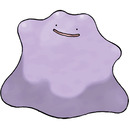

--------------------------------------------------
--------------------------------------------------
2
Nidoran♀


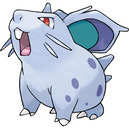

--------------------------------------------------
--------------------------------------------------
3
Skitty


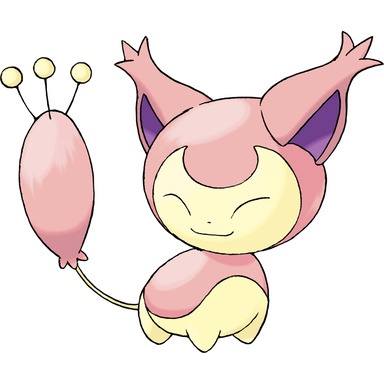

--------------------------------------------------
--------------------------------------------------
4
Patrat


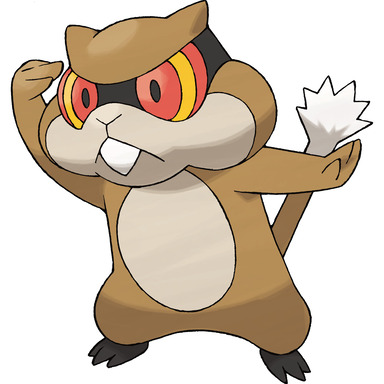

--------------------------------------------------
--------------------------------------------------
5
Tyrogue


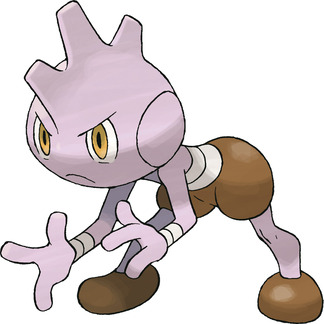

--------------------------------------------------


In [54]:
from IPython.display import Image

for n, p in enumerate(df_neighbors.index):
    index = p
    print('-' * 50)
    print(n + 1)
    print(df_pokemon.loc[index, 'Name'])
    display(Image(f'resized/{df_pokemon.loc[index, "#"]}.jpg', width=150))
    print('-' * 50)